# Parsimonious Systems

A Sparse vector has mostly zero values. Why is this interesting for us?
Well imagine you want to create a machine learning model to understate the stock market: 
<br>
<br>
You get 1000 variables that you can use to create your model. So you do so and accomplish a really good $R^2$ of 0.99.

Now imagine you could select 4 variables, of those initial 1000 variables, and get an $R^2$ of 0.91.

Sure, The $R^2$ is worse, but with a 4 variable system you can understand the model, more importantly, you have selected the 4 most important variables. The most awesome thing is that a 1000 variable system for our prediction is really susceptible to overfit, thus we are not generating a good model. A less variable system is more robust to overfitting.

**This is the main idea of parsimony systems, and it is not New for sure**

"For many events, roughly 80% of the effects come from 20% of the causes"-Pareto

" with all things being equal, the simplest explanation tends to be the right one" - Ockham's Razor

## Squared System
$(n = m)$ There  are equal unkowns and equations, therefore  there are enough mesurments to determine one exact solution. in other words:

**there is only one solution**

Example: $ n=3, m=3 $

$\begin{bmatrix} A11 & A12 & A13   \\ A21 & A22 & A23  \\ A31 & A32 & A33   \end{bmatrix}$
$\begin{bmatrix} x1 \\ x2 \\ x3  \end{bmatrix}$
$=\begin{bmatrix} b1 \\ b2 \\ b3 \end{bmatrix}$

## Underdetermined System
$(n < m)$ There  are more unkowns than equations, therefore  there are not enough mesurments to determine a solution. in other words:

**there  are infinitely many solutions**

Example: $ n=3, m=4 $

$\begin{bmatrix} A11 & A12 & A13  & A14 \\ A21 & A22 & A23  & A24\\ A31 & A32 & A33  & A14 \end{bmatrix}$
$\begin{bmatrix} x1 \\ x2 \\ x3 \\ x4 \end{bmatrix}$
$=\begin{bmatrix} b1 \\ b2 \\ b3 \end{bmatrix}$


## Overdetermined System
$(n > m)$ There  are more equations than unkowns, therefore  there are more than enough mesurments to determine one exact solution. in other words:

**As long as the rows are independent (general case) than there  are 0 solutions**

Example: $ n=4, m=3 $

$\begin{bmatrix} A11 & A12 & A13  \\ A21 & A22 & A24  \\ A31 & A32 & A33 
\\ A41 & A42 & A43 \end{bmatrix}$
$\begin{bmatrix} x1 \\ x2 \\ x3  \end{bmatrix}$
$=\begin{bmatrix} b1 \\ b2 \\ b3 \\ b4 \end{bmatrix}$


## How to solve this senarios (the traditional way):
We know that as long as our matrix is squared  (n=m)and invertible, the  solution fo the system:
$$ Ax=b $$
is given by 
$$ x=A^{-1}b \hspace{1em}....(1)$$ 



If $A$  is not squared (either $n>m$ or $n>m$) we can try to apply some methods in order to try to approximate the "**best solution**" for  the underdetermined case or the overdetermined case.
### Least Squares: 
#### proof (by orthogonal proyections):

$$ Ax=b $$
$$ A^TAx = A^Tb $$
as long as $ AA^T $ is invertible then:
$$ x = ( A^TA)^{-1}A^Tb \hspace{1em}....(2)$$

#### proof (by derivating L2 Norm) 
$\bar{y}=Ax $ prediction

${y}=b$ Actual value 

$L_2(x) = (y-\bar{y})^2 = (b-Ax)^2 = (b-Ax)^T(b-Ax)$

We want to obtain the optimal paramaeters therefore:

$$x^* = argmin_x L_2(x) $$

From our Calculus lectures we know that we can find the minimum or maximum point of a function with it's derivative. We also know that the a point is a maximum or a minimum if and only if:

$$\frac{\partial L_2}{\partial x} = 0 $$

Therefore


$$\frac{\partial (b-Ax)^T(b-Ax)}{\partial x} = 0 $$

Open the transpose term:

$$\frac{\partial (b^T-x^TA^T)(b-Ax)}{\partial x} = 0 $$

Open the multiplication:

$$\frac{\partial (b^Tb -b^TAx -x^TA^Tb + x^TA^TAx)}{\partial x} = 0 $$

Lets apply the partial dereivative 

$ \frac{\partial (b^TAx)}{\partial x} = b^TA $

If A is not a function of x and A is symmetric;

$ \frac{\partial (x^TDx)}{\partial x} = 2x^TD $

if  $ D = A^TA $ then: 

$ \frac{\partial (x^T(A^TA)x)}{\partial x} = 2x^T(A^TA) $

Leading to :

$$(-b^TA -b^TA + 2x^T(A^TA)) = 0 $$

Adding up  $ -b^TA -b^TA = -2b^TA $:

$$(-2b^TA  + 2x^T(A^TA)) = 0 $$

factoring out $2$:

$$2(-b^TA + x^T(A^TA)) = 0 $$

Dividing by $2$:

$$-b^TA + x^T(A^TA) = 0 $$

Adding $ b^TA $:

$$ x^T(A^TA) = b^TA  $$

Transposing the equality  $ (AB^T)^T = BA^T $
<br>
It is also important to hilight that:
$ (A^TA)^T =  A^T(A^T)^T = A^TA $

$$ (x^T(A^TA))^T = (b^TA)^T \rightarrow (A^TA)x = A^Tb  $$

Gettint the inverse:

$$ x = (A^TA)^{-1}A^Tb  $$


### Using svd to obtain the pseudo-inverse (moorse-psuedo inverse)
$$ Ax=b $$
Using SVD we know that a Matrix A can be decomposed into a 
<br>
transformation, a rotation, and a final trasformation therefore:
<br>
$ A= UEV^T$
$$ UEV^Tx=b $$
We know that the left pseudo-inverse of SVD is 
<br>
$A^+ = VE^{-1}U^T$
It is woth to point out that SVD generates $U$ and $V$ that are orthonormal,
<br>
Therefore $U^T$ = $U^{-1}$ and the same applies for $V$
$$ VE^{-1}(U^TU)EV^Tx= VE^{-1}U^Tb $$
Reduction
$$ V(E^{-1}E)V^Tx= VE^{-1}U^Tb $$
Reduction
$$ VV^Tx= VE^{-1}U^Tb $$
Reduction
$$ x= VE^{-1}U^Tb   \hspace{1em}....(3) $$  

Notice that the expression above is the same as $(2) $ here is the proof:

Proof:  $ ( A^TA)^{-1}A^T =   VE^{-1}U^T $

We know that:
<br>
$ A= UEV^T$ and that $ A^T= VEU^T$
Therefore:

$$ ( A^TA)^{-1}A^T = (VEU^TUEV^T)^{-1}VEU^T =   VE^{-1}U^T $$

$U^T = U^{-1}$ and $ UU^{-1} = I = U^{-1}U$

$$(VEEV^T)^{-1}VEU^T =   VE^{-1}U^T $$

Aslong as all matrices are squared then $(ABC)^{-1} =C^{-1}B^{-1}A^{-1}$

$$(V^T)^{-1}E^{-1}E^{-1}V^{^{-1}}VEU^T =   VE^{-1}U^T$$

$V^T = V^{-1}$ and $ VV^{-1} = I = V^{-1}V$

$$(V^T)^{-1}E^{-1}E^{-1}EU^T =   VE^{-1}U^T$$

$ EE^{-1} = I = E^{-1}E$

$$(V^T)^{-1}E^{-1}U^T =   VE^{-1}U^T$$

$V^T = V^{-1}$  Therefore  $(V^T)^T = V$

$$VE^{-1}U^T =   VE^{-1}U^T$$

This makes sence since in practie we solve $(2)$ using the moorse-psuedo inverse 

So far we have studied the **"best"** answer by using the $L_2$ Norm, but the fact is that there are infinte norms. lets analyze the solution for an equation uisng norms 

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from ipywidgets import interact, interactive, fixed, interact_manual

def plot_pnorm_system(p=1/np.pi,c=1,m=-2,b=4):
    n = 51 # numbper of points in vectors
    ### We will generate the 4 quadrants of the unitary circle ###
    
    ## First Quadrant  ##
    q1_x=np.linspace(0,c,n)
    ## Second Quadrant  ## 
    q2_x=np.linspace(0,-c,n)
    ## Third Quadrant  ## 
    q3_x=np.linspace(0,-c,n)
    ## Forth Quadrant  ##
    q4_x=np.linspace(0,c,n)
    
    fig = plt.figure(figsize=(10,10))

    ax1 = fig.add_subplot(223)
    
    ## Plot system ##
    s1 = np.linspace(-5,5,n)
    s2 = m*s1 + b
    ax1.plot(s1,s2,label="system")
  
    #Norm p in the first quadrant 
    x21 = get_x2(q1_x,c,p)
    ax1.plot(q1_x,x21,"g--",label=f"{p} norm")
 
    #### This are the quadrants wheere x1 is negative keep that in mind ####
    #Norm p in the second quadrant 
    if p  % 2 == 0:
        x22 = get_x2(q2_x,c,p)
    else:
        x22 = get_x2_odd(q2_x,c,p)
     
    ax1.plot(q2_x,x22,"g--")
    
    #Norm p in the third quadrant 
    if p  % 2 == 0:
        x23 = -get_x2(q3_x,c,p) 
    else:
        x23 = -get_x2_odd(q3_x,c,p)
    
        
    ax1.plot(q3_x,x23,"g--")
    
     #### end of section where  the quadrants wheere x1 is negative keep that in mind ####
    
    ## Calculate intersection:
    title = str()
    status = 0
    for q1_xi,x21i in zip(q1_x, x21):
        for s1i,s2i in zip(s1,s2):
            if (q1_xi >= s1i) and  (x21i >= s2i):
                if status == 0:
                    title = f" Solution for {p} norm found at (x1,x2)={round(s1i,1),round(s2i,1)}"
                    ax1.plot(s1i,s2i,"ro",label="intersection")
                    status = 1
                else:
                    pass
            else:
                pass
  
    if title == "":
        title = f"{p} norm "
    else:
        pass
    #Norm p in the forth quadrant 
    x24 =-get_x2(q4_x,c,p)
    ax1.plot(q4_x,x24,"g--")
    ax1.legend(loc="upper left")
    ax1.set_title(title)
    ax1.set_xlabel(f"x1")
    ax1.set_ylabel(f"x2")
    ax1.set_xlim(-5,5)
    ax1.set_ylim(-5,5)
    ax1.grid()
    

    plt.show()
    

def get_x2(x1,c,p):
    if p!=1:
        return ((c)**p-(x1)**p)**(1/p)
    else:
        return np.abs(c)-np.abs(x1)
    

def get_x2_odd(x1,c,p):
    if p>1:
        if (round(p,0) - p) == 0:
            return ((c)**p+(x1)**p)**(1/p)
        else:
             return ((c)**p-(-1*x1)**p)**(1/p)
            
    elif p<1:
        return ((c)**p-(-1*x1)**p)**(1/p)
        
    elif p==1:
        return np.abs(c)-np.abs(x1)
         
  
def pnorm(x,y,p):
    if p != 1:
        return ((x**p-y**p)**(1/p))
    else:
        return np.abs(x)+np.abs(y)
 


### INTERACT
Interact with the Jupyter notebook in order to obtain the solution for the system: $ x2 = 2x1 -4 $
With Norm 1 and Norm 2, what are the differences?

In [2]:
m=-2
b=4
interact(plot_pnorm_system,p=(0.5,3,0.5),c=(0,2,0.25),m=fixed(m),b=fixed(b))

interactive(children=(FloatSlider(value=0.5, description='p', max=3.0, min=0.5, step=0.5), FloatSlider(value=1…

<function __main__.plot_pnorm_system(p=0.3183098861837907, c=1, m=-2, b=4)>

In [3]:
interact(plot_pnorm_system,p=(0.5,3,0.5),c=(1.5,2,0.01),m=fixed(m),b=fixed(b))

interactive(children=(FloatSlider(value=0.5, description='p', max=3.0, min=0.5, step=0.5), FloatSlider(value=1…

<function __main__.plot_pnorm_system(p=0.3183098861837907, c=1, m=-2, b=4)>

In [92]:
#### NORM 2 ####
### Define Norms and their Respective Gradients ####

## L2 NORM ###
def L2_Norm(X,y,W):
    N = len(X)
    return 1/N*((X.dot(W) - y)**2).sum()

def L2_Norm_gradient(X,y,W):
    N = len(X)
    return (2/N)*(X.T).dot(X.dot(W) - y)


def L2_Norm_Gradient_descent(X,y,W,a,epochs):
    loss=[]
    N = len(y)
    for i in range(0,epochs):
         ### Compute gradient ###
        dW = L2_Norm_gradient(X,y,W)
        
        ### Gradient Descent ###
        W = W - a*dW
        
        loss.append(a*L2_Norm(X,y,W))
    
    y_hat = X.dot(W)
    y_mean = y.sum()/N
    st = ((y-y_mean)**2).sum()   # Standar deviation  of data
    sr = ((y-y_hat)**2 ).sum()   # standard deviation of prediction
    r2   = (st-sr)/st            # R2 coefficient
    
    return W,loss,r2
        
    

        
def plot_loss(loss,X,y,W,r2,name="L2"):
   
    fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(15,7))
    
    ### PLOT LOSS ###
    iterations = list(range(0,len(loss)))
    ax[0].plot(iterations,loss,"b--",label ="loss")
    ax[0].legend(loc="lower right")
    ax[0].set_xlabel("iterations")
    ax[0].set_ylabel("loss ")
    ax[0].set_title(f"Linear Regression with {name} Norm loss={loss[-1]:2f}")
    ax[0].grid("on")
    
    ### PLOT  Data ###
    y_hat = X.dot(W)
    x = X[:,1]
    ax[1].plot(x,y_hat,"b--",label ="prediction")
    ax[1].plot(x,y,"r*",label='data')
    ax[1].legend(loc="lower right")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("y")
    ax[1].set_title(f"Linear Regression with {name} Norm: m={W[1]} b={W[0]}, r2={r2:2f}")
    plt.grid("on")
    plt.show()
    
    
## Norm 1 ##
### L1 NORM ###

def L1_Norm(X,y,W):
    N = len(X)
    return 1/N*(np.abs(X.dot(W) - y)).sum()

def sign(e):
    s = 0
    if e < 0:
        s = -1
    elif e > 0:
        s = 1
    return s

def L1_Norm_gradient(X,y,W):
    N = len(X)
    return (1/N)*(X.T).dot(np.sign(X.dot(W) - y))
        

def L1_Norm_Gradient_descent(X,y,W,a,epochs):
    loss=[]
    N = len(y)
    for i in range(0,epochs):
         ### Compute gradient ###
        dW = L1_Norm_gradient(X,y,W)
        
        
        ### Gradient Descent ###
        W = W - a*dW
        
        loss.append(a*L1_Norm(X,y,W))
    
    y_hat = X.dot(W)
    y_mean = y.sum()/N
    st = ((y-y_mean)**2).sum()   # Standar deviation  of data
    sr = ((y-y_hat)**2 ).sum()   # standard deviation of prediction
    r2   = (st-sr)/st            # R2 coefficient
    
    return W,loss,r2
    

In [106]:
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])                        # initiate vector
y = m*x +b      + np.random.uniform(low=-1, high=1, size=(x.shape[0],)) # Get targets (with noise)
y[4] =  y[4] + 9                                                        # Add outliers
y[8] =  y[8] + 9                                                        # Add outliers

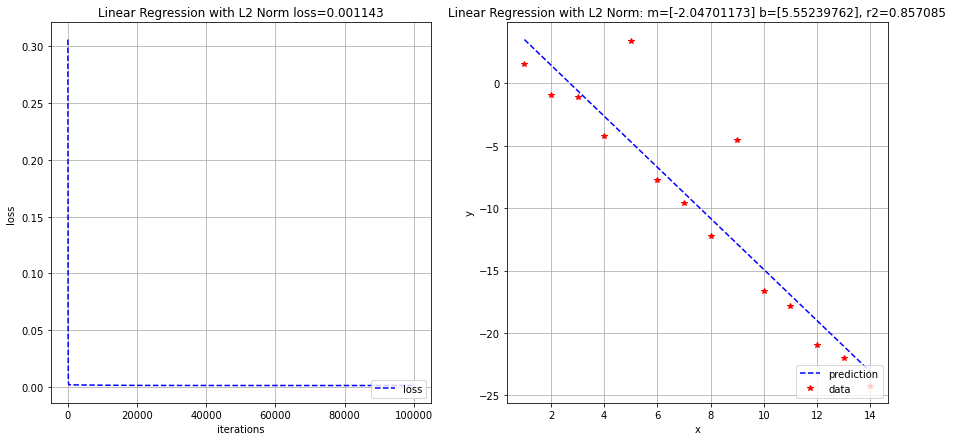

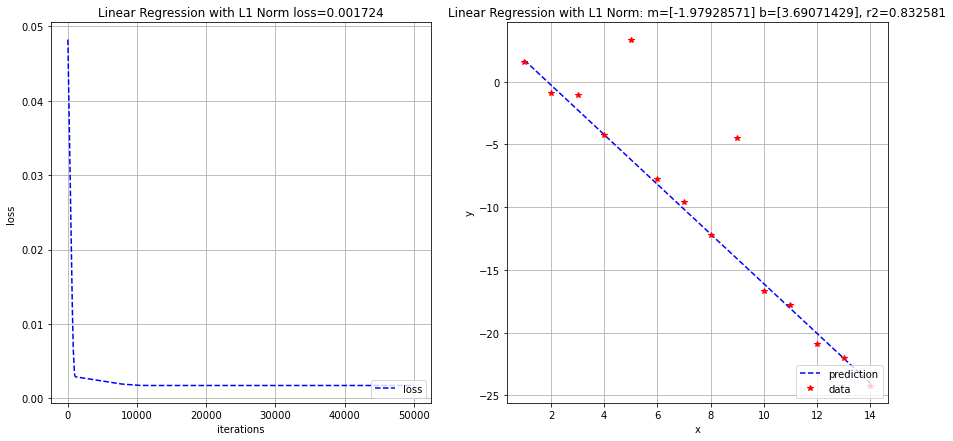

In [105]:
x0 = np.ones_like(x)
X  = np.stack((x0,x)).T
y1 = y.reshape(-1,1)

W = np.array([[1],[5]])                                          # Intial Guess For W
W, loss,r2 = L2_Norm_Gradient_descent(X,y1,W,a=0.0001,epochs=100000) # Compute Gradient Descent with L2 Norm
plot_loss(loss,X,y1,W,r2,name="L2")

W = np.array([[1],[5]])                                            # Intial Guess For W
W, loss,r2 = L1_Norm_Gradient_descent(X,y1,W,a=0.001,epochs=50000) # Compute Gradient Descent with L2 Norm
plot_loss(loss,X,y1,W,r2,name="L1")                                # Plot loss and predictions